 # 实验设计

这是两款键盘布局不一样的手机(A版本，B版本)，你作为公司的产品经理，想在正式发布产品之前知道，哪个键盘布局对用户体验更好呢？

首先，我们需要设置目标，用来衡量各个版本的优劣，如果是电商网站，目标可以是`点击率`，`注册率`，`页面停留时间`等。

在这个键盘布局案例里，如果一个键盘布局对用户打字时拼错产生的影响较小，那么这个布局是符合用户体验习惯的。

所以我们将目标定为`不同布局的打错字数`。

有了目标以后，下一步就是采集数据。

我们随机抽取实验者，将实验者分成2组，每组25人，A组使用键盘布局A，B组使用键盘布局B。让他们在30秒内打出标准的20个单词文字消息，然后记录打错字的数量。

我们将数据记录在Excel中，A列是使用键盘A打错字的数量，B列是使用键盘B打错字的数量。

现在我们开始A/B测试

# 一、描述统计分析

进行统计分析时，第一步必须先计算出描述统计分析的特征，以便后期进一步分析结果。

In [2]:
#导入包
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
'''
路径和文件名中不要用中文，不然会报错
encoding用于指定文件的编码，因为读取的csv中有中文，所以指定文件编码为中文编码“GBK”
'''
xls = pd.ExcelFile(r'E:\Jupyter\键盘AB测试.xlsx')
data=xls.parse('Sheet1',dtype='int') #这里转换的数据类型应该写成int，而不是object，否则数据进行描述的时候不会统计均值和方差
data.head()

,A,B
0,6,6
1,6,11
2,2,8
3,7,5
4,8,11


In [21]:
data.describe()

,A,B
count,25.000000,25.000000
mean,5.080000,7.800000
std,2.059935,2.645751
min,2.000000,3.000000
25%,4.000000,6.000000
50%,5.000000,8.000000
75%,7.000000,10.000000
max,10.000000,13.000000


In [22]:
'''
第一组数据：A键盘的平均出错数和方差
'''
#第一组数据均值
A_mean = data['A'].mean()
# 第一组数据标准差
A_std = data['A'].std()

'''
第二组数据：B键盘的平均出错数和方差
'''
# 第二组数据均值
B_mean = data['B'].mean()
# 第二组数据标准差
B_std = data['B'].std()

使用柱状图对两个样本数据进行比较

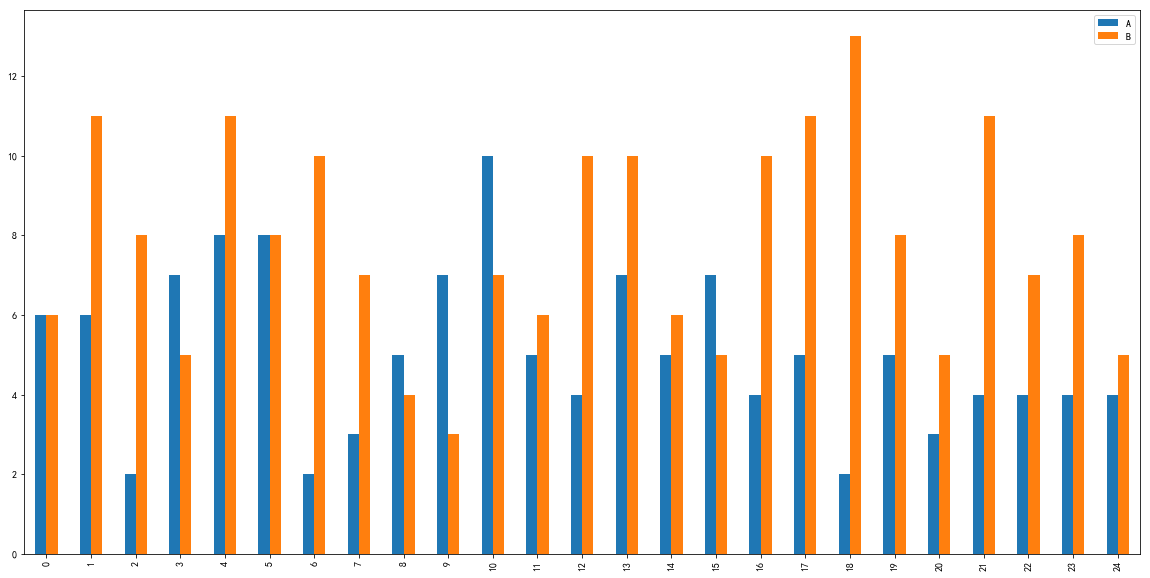

In [23]:
#两个样本数据集对比
#画板
fg = plt.figure(figsize = (20,10))
#画纸
ax = fg.add_subplot(1,1,1)
#绘制柱状图
data.plot(kind = 'bar',ax = ax)
#显示图形
plt.show()

In [25]:
print('描述统计分析结果：')
print('第一组数据：A键盘，实验者的打字平均出错数是:',A_mean,'个,标准差是',A_std,'个')
print('第二组数据：B键盘，实验者的打字平均出错数是:',B_mean,'个,标准差是',B_std,'个')
print('可见，A键盘的出错均值小于于B键盘')

描述统计分析结果：
第一组数据：A键盘，实验者的打字平均出错数是: 5.08 个,标准差是 2.05993527406405 个
第二组数据：B键盘，实验者的打字平均出错数是: 7.8 个,标准差是 2.6457513110645903 个
可见，A键盘的出错均值小于于B键盘


# 二、推论统计分析

推论统计分析报告中包括：假设检验，置信区间，效应量

## 1.问题是什么？

### 零假设和备选假设

本次统计主要是为了确定A，B两种键盘的出错率，因此作出以下假设

零假设H0：A,B两种键盘打字出错率没有明显区别；

备选假设H1：A,B两种键盘的打字出错率存在明显区别。

### 检验类型

检验类型有很多种，因为该使用两组数据是独立的样本，所以为双样本独立检验。  

检验类型参考资料：http://support.minitab.com/zh-cn/minitab/17/topic-library/basic-statistics-and-graphs/hypothesis-tests/tests-of-means/types-of-t-tests/

### 抽样分布类型

我们还要判断抽样分布是哪种？因为抽样分布的类型，决定了后面计算p值的不同。

在我们这个案例中，样本大小是25（小于30），属于小样本。那小样本的抽样分布是否满足t分布呢？因为t分布还要求数据集近似正态分布，所以下面图片我们看下差值数据集的分布长什么样。

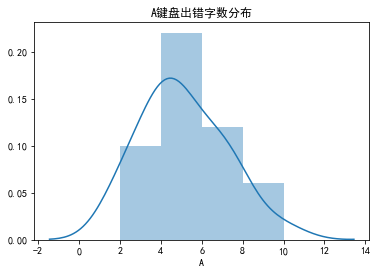

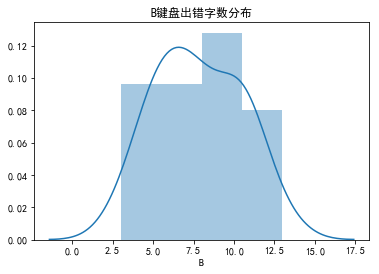

In [28]:
'''
直方图能够粗略估计数据密度，如果想给数据一个更精确的拟合曲线（专业术语叫：核密度估计kernel density estimate (KDE)），
Seaborn 可以很方便的画出直方图和拟合曲线。
查看数据集分布官网教程地址：https://seaborn.pydata.org/tutorial/distributions.html

安装绘图包seaborn：
conda install seaborn
'''
#导入绘图包
import seaborn as sns
#查看数据集分布
sns.distplot(data['A'])
plt.title('A键盘出错字数分布')

plt.show()

sns.distplot(data['B'])
plt.title('B键盘出错字数分布')

plt.show()

通过观察上面差值数据集分布图，数据集近似正态分布，所以满足t分布的使用条件，我们可以使用双样本独立t检验。

### 检验方向

单尾检验（左尾，右尾），还是双尾检验？

因为备选假设是：A,B两键盘打字出错数是否存在明显区别。

所以我们使用单尾检验中的双尾检验，显著水平为5%，t检验的自由度df=n-1=25-1=24

## 2.证据是什么？

在零假设成立前提下，得到样本平均值的概率p是多少？

In [29]:
'''
用python统计包scipy自动计算
用scipy计算出的是：双尾检验
单（1samp）样本t检验（ttest_1samp）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_1samp.html
相关（related）配对t检验（ttest_rel）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html
双独立（independent）样本t检验（ttest_ind）：https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
'''
#导入统计模块（stats）
from scipy import stats

'''
ttest_rel：相关配对检验
返回的第1个值t是假设检验计算出的（t值），
第2个值p是双尾检验的p值
'''
t,p_twoTail = stats.ttest_ind(data['A'],data['B'])

print('t值=',t,'双尾检验的p值=',p_twoTail) 

t值= -4.05593853686 双尾检验的p值= 0.000182560617201


In [30]:
'''
上述分析可见Scipy的双独立样本t检验不能返回自由度，对于后面计算置信区间不方便。所以我们使用另一个统计包（statsmodels）

需要在conda中当前notebook文件所在的python环境下安装统计包（statsmodels），安装命令：
conda install statsmodels

双独立（independent）样本t检验（ttest_ind）
statsmodels.stats.weightstats.ttest_ind
官网使用文档http://www.statsmodels.org/dev/generated/statsmodels.stats.weightstats.ttest_ind.html
'''
import statsmodels.stats.weightstats as st

'''
ttest_ind：独立双样本t检验，
usevar='unequal'两个总体方差不一样
返回的第1个值t是假设检验计算出的（t值），
第2个p_two是双尾检验的p值
第3个df是独立双样本的自由度
'''
t,p_two,df=st.ttest_ind(data['A'],data['B'],
                        usevar='unequal')

#自由度一般只保留整数部分
print('t=',t,'p_two=',p_twoTail,',df=',df)

t= -4.05593853686 p_two= 0.000182560617201 ,df= 45.2781333114


## 3.判断标准是什么？

In [ ]:
#显著水平使用alpha=5%
alpha=0.05

## 4.做出结论

In [31]:
'''
本次分析的直接是双尾检验，因此p直接与alpha进行对比
'''
#显著水平
a=0.05
#决策
if(p_twoTail< a):
    print('拒绝零假设，有统计显著')
    print('也就是接受备选假设：AB键盘打字出错数存在明显差异')
else:
    print('接受备选假设，没有统计显著，也就是AB键盘不存在明显差异')

拒绝零假设，有统计显著
也就是接受备选假设：AB键盘打字出错数存在明显差异


假设检验报告：

双样本独立检验t(45)=-4.06,p=0.00018 (α=5%),双尾检验

统计上存在显著差异，拒绝零假设，说明AB键盘存在明显差异。

## 5. 置信区间

In [32]:
'''
1）置信水平对应的t值（t_ci）
查t表格可以得到，95%的置信水平对应的t值=2.0141
2）计算上下限
置信区间上限a=样本平均值 - t_ci ×标准误差
置信区间下限b=样本平均值 - t_ci ×标准误差
'''

'''
95%的置信水平，自由度是n-1对应的t值
查找t表格获取，
也可以通过这个工具获取：https://www.graphpad.com/quickcalcs/statratio1/（利用这个工具获取t值，需要注意输入的概率值是1-95%=0.05）
注意：课程中这里对应的下面t_ci值有误，以下面的值为准
'''
t_ci=2.0141
#差值数据集平均值
sample_mean=A_mean-B_mean
#使用双样本独立假设的标准差计算公式
se=np.sqrt(np.square(A_std)/25+np.square(B_std)/25)
#置信区间上限
a=sample_mean - t_ci * se
#置信区间下限
b=sample_mean + t_ci * se


#标准误差:https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.sem.html

In [33]:
print('两个平均值差值的置信区间，95置信水平 CI=[%f,%f]' % (a,b))

两个平均值差值的置信区间，95置信水平 CI=[-4.070699,-1.369301]


可见，A键盘相对B键盘的出错数要小1-4个左右。

## 6.效应量

In [42]:
'''
效应量：差异指标Cohen's d
'''

#差值数据集的合并标准差
sample_std=np.sqrt((24*np.square(A_std)+24*np.square(B_std))/48)

#计算效应量
d1=(A_mean - B_mean) / sample_std

print('d=',d1)

d= -1.1471926574


# 三、数据分析报告总结

1、描述统计分析

第一组数据：A键盘，实验者的打字平均出错数是: 5.08 个,标准差是 2.05993527406405 个

第二组数据：B键盘，实验者的打字平均出错数是: 7.8 个,标准差是 2.6457513110645903 个

可见，A键盘的打字出错数小于B键盘

2、推论统计分析

1）假设检验

双样本独立检验t(45)=-4.06,p=0.00018 (α=5%),双尾检验

统计上存在显著差异，拒绝零假设，从而验证AB键盘存在显著差异。


2）置信区间

两个平均值差值的置信区间，95%置信水平 CI=[-4.070699,-1.369301]

3）效应量

d= - 1.147